# **Creative Writing with Machine**

To get Started,

1. Copy this notebook to your google drive
2. Make sure you're running the notebook on google chrome
3. Run code cell by cell


Some Issues,

1. ResourceErrors, If you're using the free version of collaboratory then you might encounter this error. It happens because this model requires quite large amount of memory to run.

2. It is necessary to remove the previous tensorflow session whenever a new session is created otherwise, some cells will not run.

3. Tensorflow session can be reset with the following command `!kill -9 -1`

## About the Dataset

I retrained GPT2 (117M) on a corpus dataset of tiny Shakespearean sentences and a contemporary poem dataset based on [Poetry Foundation's Website](https://en.wikipedia.org/wiki/Poetry_Foundation).




In [1]:
!pip install -q gpt-2-simple
import gpt_2_simple as gpt2
import requests
import os

## About GPT-2

GPT-2 is a large transformer-based language model with up-to 1.5 billion parameters, trained on a large ~40GB corpus of dataset. GPT-2 is trained with a simple objective to predict the next word, given some previous text.



### Downloading GPT2

There are three released sizes of GPT-2:

*   124M (default): the "small" model, 500MB on disk. 
*   355M: the "medium" model, 1.5GB on disk.
*   774M: the "large" model, cannot currently be finetuned with Colaboratory  but can be used to generate text from the pretrained model
*   1558M: the "extra large", true model. Will not work if a K80/P4 GPU is attached to the notebook.


For example, 124M GPT2 contains 124 million paramaters.

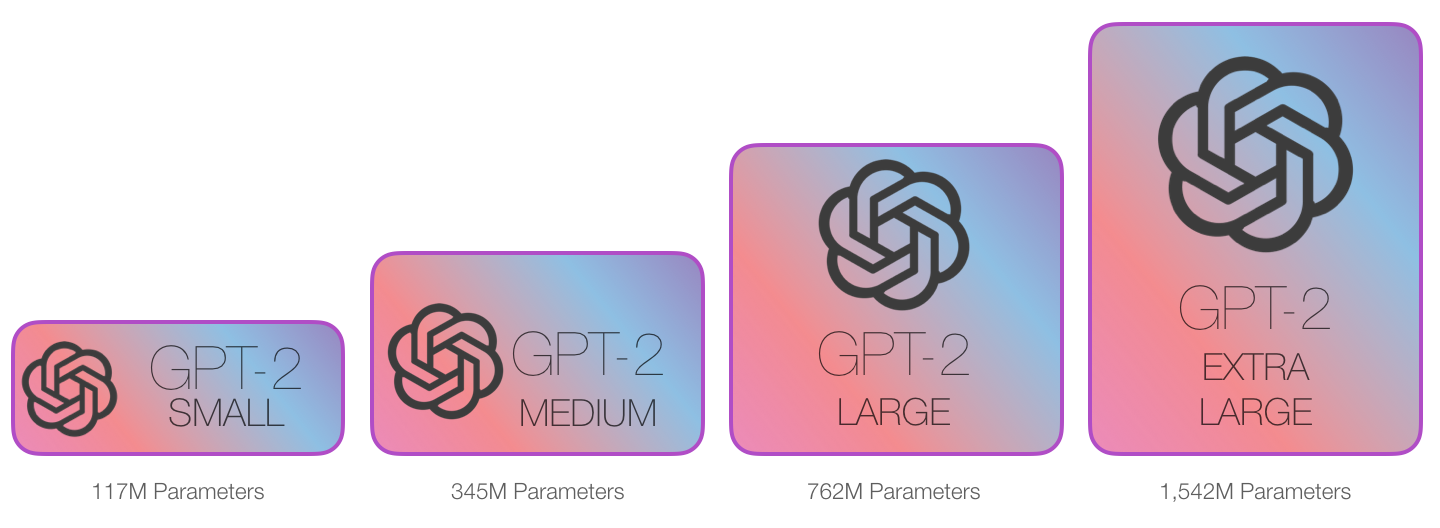


In [ ]:
model_name = "124M"
if not os.path.isdir(os.path.join("models", model_name)):
	print(f"Downloading {model_name} model...")
	gpt2.download_gpt2(model_name=model_name)   


Fetching checkpoint: 1.05Mit [00:00, 538Mit/s]                                                      
Fetching encoder.json: 1.05Mit [00:01, 969kit/s]
Fetching hparams.json: 1.05Mit [00:00, 385Mit/s]                                                    
Fetching model.ckpt.data-00000-of-00001: 498Mit [01:15, 6.63Mit/s]                                  
Fetching model.ckpt.index: 1.05Mit [00:00, 541Mit/s]                                                
Fetching model.ckpt.meta: 1.05Mit [00:00, 1.16Mit/s]
Fetching vocab.bpe: 1.05Mit [00:00, 1.15Mit/s]


## Loading Data

Data file name that we will fine-tune our model with. In this project there are two data files that we will use.

1. [ shakespeare.txt   (Tiny Shakespeare)](https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt)
2. [poem.txt   (Poetry)](https://www.gwern.net/docs/ai/poetry/2019-03-06-gpt2-poetry-1000samples.txt)

In [ ]:
file_name = 'poem.txt'

### Loading the Data File From Google Drive

If you have the data file in google drive, run the cell below to load the data into the notebook.

Running this cell (will only work in Colaboratory by Google) will mount Your Google Drive in this Notebook.

In [ ]:
gpt2.mount_gdrive()

Mounted at /content/drive


In [ ]:
gpt2.copy_file_from_gdrive(file_name)

### Loading the Data File From Web

Or we can use the web to get our data directly into the notebook with the following cell.

In [ ]:
if not os.path.isfile(file_name):
	url = 'https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt' 
  #url = 'https://www.gwern.net/docs/ai/poetry/2019-03-06-gpt2-poetry-1000samples.txt'


  #@Dataset{
  #author={Karpathy, Andrej},
  #title={char-rnn},
  #year={2015},
  #howpublished={\url{https://github.com/karpathy/char-rnn} }
  #}

	data = requests.get(url)

	with open(file_name, 'w') as f:
		f.write(data.text)

After downloading the data from the web, it is recommended that we save it to google drive and reuse it from there.

In [ ]:
gpt2.copy_file_to_gdrive(file_name)

## Fine-tuning GPT-2 Model

In this cell we will start finetuning GPT-2. It will create a TensorFlow session which will store the training config, then runs the training for specified number of steps. 

The model checkpoints are automatically saved in `/checkpoint/run1` by default.


In [ ]:
sess = gpt2.start_tf_sess()
gpt2.finetune(sess,
              file_name,
              model_name=model_name,
              steps=1000,
							restore_from='fresh', 
							print_every=10, 
							sample_every=100,
  					  save_every=1000)  

Loading checkpoint models/124M/model.ckpt
INFO:tensorflow:Restoring parameters from models/124M/model.ckpt
Loading dataset...


100%|██████████| 1/1 [00:04<00:00,  4.96s/it]


dataset has 1034166 tokens
Training...
[10 | 17.29] loss=3.19 avg=3.19
[20 | 29.95] loss=3.44 avg=3.32
[30 | 42.60] loss=3.10 avg=3.24
[40 | 55.26] loss=3.06 avg=3.20
[50 | 67.92] loss=2.32 avg=3.02
[60 | 80.59] loss=3.03 avg=3.02
[70 | 93.25] loss=2.72 avg=2.98
[80 | 105.91] loss=2.84 avg=2.96
[90 | 118.57] loss=3.13 avg=2.98
[100 | 131.23] loss=3.21 avg=3.00
======== SAMPLE 1 ========
, in the light, and in the glory of the world.
For I know my hope is not in vain,
For the love of the Lord is not in vain
Of me! and the light of God
For this I'm sure is the light of God.
For He is my hope!
For I am in despair,
For I am not sure!
For I was afraid!
And I am afraid!
But what do ye fear but those things I say?
For the Lord Jesus will bless you,
And let the people to hear God,
And let the world say His name!
For I was afraid! and I am afraid!
For I am afraid! and I am afraid!
For I am afraid! and I am afraid!
And this I am afraid, and this I am afraid;
For I am afraid! and I am afraid!
And

### Saving the Fine-Tuned Model To Checkpoint
After the model is trained, let's copy the checkpoint folder to Google Drive so we can reuse this later.

In [ ]:
gpt2.copy_checkpoint_to_gdrive(run_name='run1')

## Loading a Trained Model Checkpoint

If we already have a fine-tuned model, and we dont want to train the model again, we can easily load the fine-tuned model from our checkpoint.

Running the next cell will copy the checkpoint file from the Google Drive into the notebook.



In [ ]:
# The following code will restart the notebook and reset the session.
!kill -9 -1

## 

In [ ]:
gpt2.copy_checkpoint_from_gdrive(run_name='run1')

### Starting a New Session After Loading a Checkpoint

In [ ]:
sess2 = gpt2.start_tf_sess()
gpt2.load_gpt2(sess2, run_name='run1')

Loading checkpoint checkpoint/run1/model-1000
INFO:tensorflow:Restoring parameters from checkpoint/run1/model-1000


### Generate Text From The Fine-Tuned Model Checkpoint

After the model is trained the model or loaded from a checkpoint, we can now generate text using `gpt2.generate`.

Some parameters for `gpt2.generate` are:

*  **`length`**: Number of tokens to generate (default 1023, the maximum)
* **`temperature`**: The higher the temperature, the crazier the text (default 0.7, recommended to keep between 0.7 and 1.0)
* **`top_k`**: Limits the generated guesses to the top *k* guesses (default 0 which disables the behavior; if the generated output is super crazy, you may want to set `top_k=40`)
* **`top_p`**: Nucleus sampling: limits the generated guesses to a cumulative probability. (gets good results on a dataset with `top_p=0.9`)
* **`truncate`**: Truncates the input text until a given sequence, excluding that sequence (e.g. if `truncate='<|endoftext|>'`, the returned text will include everything before the first `<|endoftext|>`). It may be useful to combine this with a smaller `length` if the input texts are short.
*  **`include_prefix`**: If using `truncate` and `include_prefix=False`, the specified `prefix` will not be included in the returned text.

In [ ]:
gpt2.generate(sess2, 
              length=250, 
							temperature=0.9,
							nsamples=1, 
							batch_size=1,
              run_name='run1')

user-submitted content
Part of my daily business: let me be gone. What! art thou gone?

ROMEO:
No, no: I was gone before.

CAMILLO:
I fly, villain!

JULIET:
O, 'twill be my folly, to entreat you
To have some business with me, when you have
Intended to speak with Juliet. Scape not away:
I rather must suffer by this than come in
To know that she's here; although this be't
To know she's here.

ROMEO:
O, know you that?

Servant:
Yea, there's some instruction in't.

Servant:
I know it, I; and must obey it.

ROMEO:
'Tis some matter.

Servant:
Put down, go down.

ROMEO:
No, do not budge; let alone plunge
A room or two of fire into a babe's face:
That's the measure of a woman's face.

Servant:
What fire is there, 'tis not hot enough


##  Generating Text From Pre-Trained Model

Run the cells below if you want to generate text from the pre-trained model, not a fine-tuned model.

In [ ]:
# The following code will restart the notebook and reset the session.
!kill -9 -1

In [2]:
model_name = "774M"

gpt2.download_gpt2(model_name=model_name)

Fetching checkpoint: 1.05Mit [00:00, 663Mit/s]                                                      
Fetching encoder.json: 1.05Mit [00:00, 3.42Mit/s]
Fetching hparams.json: 1.05Mit [00:00, 452Mit/s]                                                    
Fetching model.ckpt.data-00000-of-00001: 3.10Git [02:27, 21.0Mit/s]
Fetching model.ckpt.index: 1.05Mit [00:00, 776Mit/s]                                                
Fetching model.ckpt.meta: 2.10Mit [00:00, 6.62Mit/s]                                                
Fetching vocab.bpe: 1.05Mit [00:00, 4.11Mit/s]


In [3]:
sess = gpt2.start_tf_sess()
model_name = "774M"
gpt2.load_gpt2(sess, model_name=model_name)

Loading pretrained model models/774M/model.ckpt
INFO:tensorflow:Restoring parameters from models/774M/model.ckpt


In [10]:
prompt="""
I never knew how joyous life could be until I saw your face.
My heart leaps like a hummingbird in flight every time I see you.
This is something I have never felt before, and it is you that inspires it.

When I think about you and our rich conversations, I feel a warmness inside.
I cannot hide my smiles, even when we are apart.
This connection is special, amazing, and I dare say, destiny.
"""

gpt2.generate(sess,
              model_name=model_name,
              prefix=prompt,
              length=100,
              temperature=0.8,
              top_p=0.9,
              nsamples=5,
              batch_size=5
              )

I never knew how joyous life could be until I saw your face.
My heart leaps like a hummingbird in flight every time I see you.
This is something I have never felt before, and it is you that inspires it.

When I think about you and our rich conversations, I feel a warmness inside.
I cannot hide my smiles, even when we are apart.
This connection is special, amazing, and I dare say, destiny.

I can never repay you for all your kindness and generosity, but I will never forget you.

I am your friend forever, and I will forever be your friend.

I will never forget you.

I have been waiting for this day so long.

It is my hope that we can grow as friends and lovers.

Thank you for everything.

Love,

Christina<|endoftext|>This is a big week for the European Union, with negotiations set
I never knew how joyous life could be until I saw your face.
My heart leaps like a hummingbird in flight every time I see you.
This is something I have never felt before, and it is you that inspires it.

When I